# Exploring music evolution over the last century

## 0. Library imports

In [1]:
!pip install -r requirements.txt

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [3]:
if not os.path.exists("plots"):
        os.mkdir("plots")

## 1. Data imports

In [4]:
data = pd.read_csv('data/data_by_year.csv')
data

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


## 2. Data cleaning

In [5]:
data = data[['year', 'energy', 'acousticness', 'duration_ms', 'danceability']] 
display(data)

,year,energy,acousticness,duration_ms,danceability
0,1921,0.231815,0.886896,260537.166667,0.418597
1,1922,0.237815,0.938592,165469.746479,0.482042
2,1923,0.262406,0.957247,177942.362162,0.577341
3,1924,0.344347,0.940200,191046.707627,0.549894
4,1925,0.278594,0.962607,184986.924460,0.573863
...,...,...,...,...,...
95,2016,0.592855,0.284171,221396.510295,0.600202
96,2017,0.590421,0.286099,211115.696787,0.612217
97,2018,0.602435,0.267633,206001.007133,0.663500
98,2019,0.593224,0.278299,201024.788096,0.644814


In [6]:
data['duration_ms'] = (data['duration_ms'] / 1000).round(3)

/var/folders/0l/v3bdnpq11fbfhlwsbhdph8c80000gn/T/ipykernel_57158/911615766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_ms'] = (data['duration_ms'] / 1000).round(3)


In [7]:
data = data.rename(columns={'duration_ms': 'duration_sec'})

In [8]:
data = data.round(3)

## 3. Obtain energy-acousticness correlation

In [9]:
data['energy_acousticness_ratio'] = data['acousticness'] / data['energy']
data['energy_danceability_ratio'] = data['danceability'] / data['energy']
data

,year,energy,acousticness,duration_sec,danceability,energy_acousticness_ratio,energy_danceability_ratio
0,1921,0.232,0.887,260.537,0.419,3.823276,1.806034
1,1922,0.238,0.939,165.470,0.482,3.945378,2.025210
2,1923,0.262,0.957,177.942,0.577,3.652672,2.202290
3,1924,0.344,0.940,191.047,0.550,2.732558,1.598837
4,1925,0.279,0.963,184.987,0.574,3.451613,2.057348
...,...,...,...,...,...,...,...
95,2016,0.593,0.284,221.397,0.600,0.478921,1.011804
96,2017,0.590,0.286,211.116,0.612,0.484746,1.037288
97,2018,0.602,0.268,206.001,0.664,0.445183,1.102990
98,2019,0.593,0.278,201.025,0.645,0.468803,1.087690


## 4. Data exploration

In [10]:
data.describe()

,year,energy,acousticness,duration_sec,danceability,energy_acousticness_ratio,energy_danceability_ratio
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1970.500000,0.452690,0.556360,227.296770,0.536720,1.687463,1.351276
std,29.011492,0.161753,0.275376,25.630047,0.052402,1.331987,0.510477
min,1921.000000,0.208000,0.220000,156.882000,0.414000,0.348653,0.838710
25%,1945.750000,0.280750,0.289750,210.889500,0.500750,0.486669,0.943361
50%,1970.500000,0.496000,0.459000,235.521000,0.541000,0.921735,1.069778
75%,1995.250000,0.598250,0.856750,247.702500,0.571000,3.134924,1.769886
max,2020.000000,0.682000,0.963000,267.678000,0.693000,4.514423,2.843602


## 4. Data visualization

### 5.1. Assigning constants to use later

In [11]:
years = [1921, 1940, 1960, 1980, 2000, 2020]
TICK_FONT = 20
FONT = 20

font = {'family' : 'helvetica',
        'weight' : 'normal',
        'size'   : FONT}

### 5.2. Plots
The first plot shows changes in average song acousticness, energy and danceability over the years.

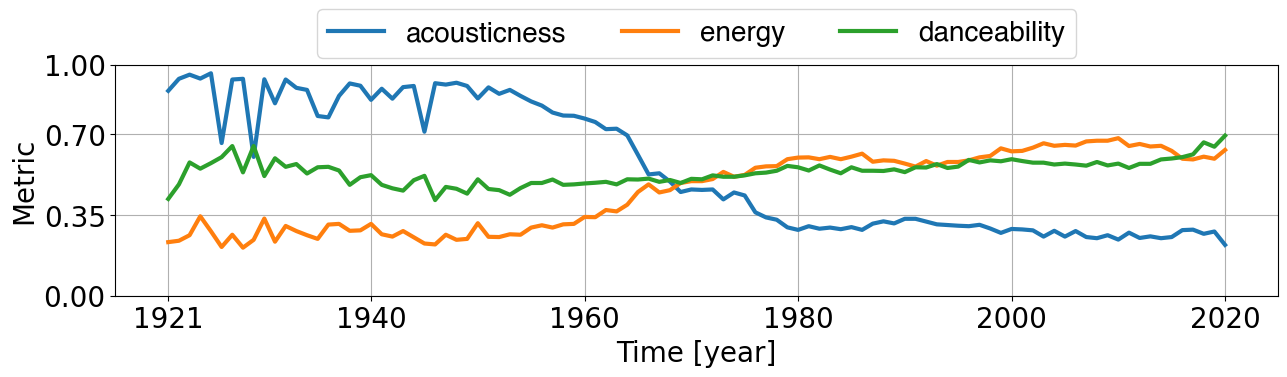

In [12]:
plt.figure(figsize=(15, 3))

plt.xticks(years, fontsize=20)
plt.yticks([0, 0.35, 0.70, 1], fontsize=20)

plt.ylim(0, 1)
plt.grid()

plt.rc('font', **font)

plt.plot(data['year'], data['acousticness'], label='acousticness', linewidth=3)
plt.plot(data['year'], data['energy'], label='energy', linewidth=3)
plt.plot(data['year'], data['danceability'], label='danceability', linewidth=3)


plt.legend(bbox_to_anchor=(0.5, 1.3), loc='upper center', ncol=3, fontsize=20)

plt.xlabel("Time [year]", fontsize=20)
plt.ylabel("Metric", fontsize=20)

plt.savefig("plots/acousticness-energy-danceability.pdf", format="pdf", bbox_inches="tight")
plt.show()

Second plot depicts ratio between mean song energy and acousticness over the last century

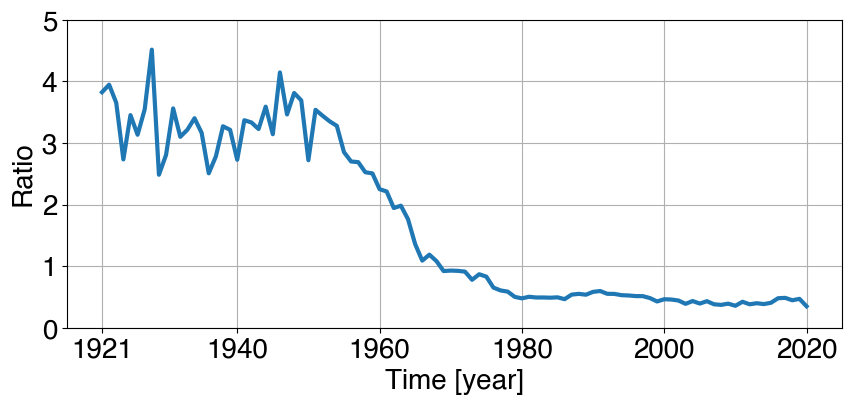

In [13]:
plt.figure(figsize=(10, 4))

plt.xticks(years, fontsize=TICK_FONT)
plt.yticks([0, 1, 2, 3, 4, 5], fontsize=TICK_FONT)

plt.ylim(0,5)
plt.grid()

plt.rc('font', **font)

plt.plot(data['year'], data['energy_acousticness_ratio'], label='energy:acousticness ratio', linewidth=3)

plt.ylabel('Ratio')
plt.xlabel("Time [year]")

plt.savefig("plots/energy-acousticness.pdf", format="pdf", bbox_inches="tight")
plt.show()

The next plot shows changes in mean song duration. Notice the noticeable decrease during the last 10 years

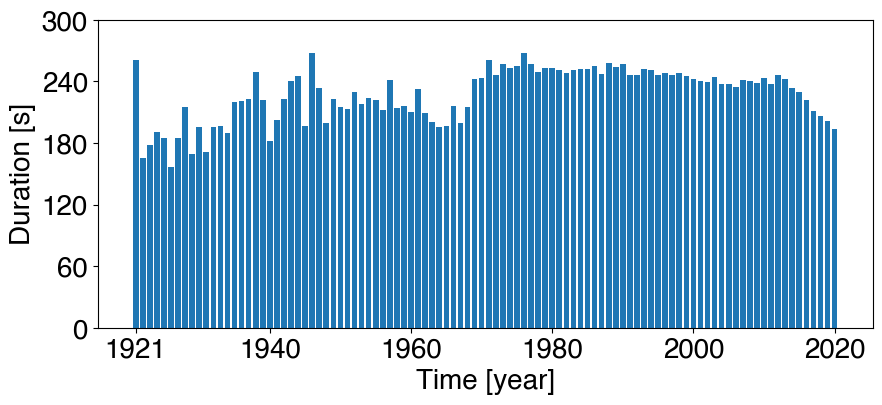

In [14]:
plt.figure(figsize=(10, 4))

plt.xticks(years, fontsize=TICK_FONT)
plt.yticks([0, 60, 120, 180, 240, 300], fontsize=TICK_FONT)

plt.ylim(0,300)

plt.rc('font', **font)
plt.bar(data['year'], data['duration_sec'], label="duration", linewidth=3)

plt.xlabel("Time [year]")
plt.ylabel('Duration [s]')

plt.savefig("plots/duration.pdf", format="pdf", bbox_inches="tight")

The final plot depicts the ratio of energy and danceability of songs throughout the years.

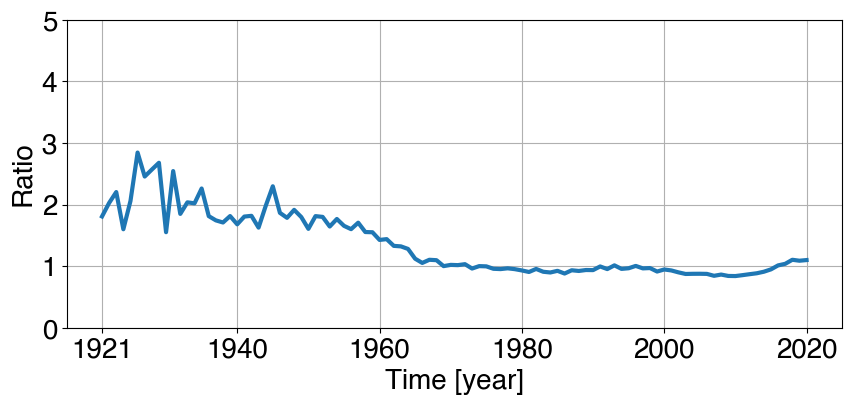

In [15]:
plt.figure(figsize=(10, 4))

plt.xticks(years, fontsize=TICK_FONT)
plt.yticks([0, 1, 2, 3, 4, 5], fontsize=TICK_FONT)

plt.ylim(0,5)
plt.grid()

plt.rc('font', **font)

plt.plot(data['year'], data['energy_danceability_ratio'], label='energy:danceability ratio', linewidth=3)

plt.xlabel("Time [year]")
plt.ylabel('Ratio')

plt.savefig("plots/energy-danceability.pdf", format="pdf", bbox_inches="tight")

/var/folders/0l/v3bdnpq11fbfhlwsbhdph8c80000gn/T/ipykernel_57158/3572895604.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1.0', '0.75', '0.50', '0.25', '0', '0.25', '0.50', '0.75', '1.0'], fontsize=30)


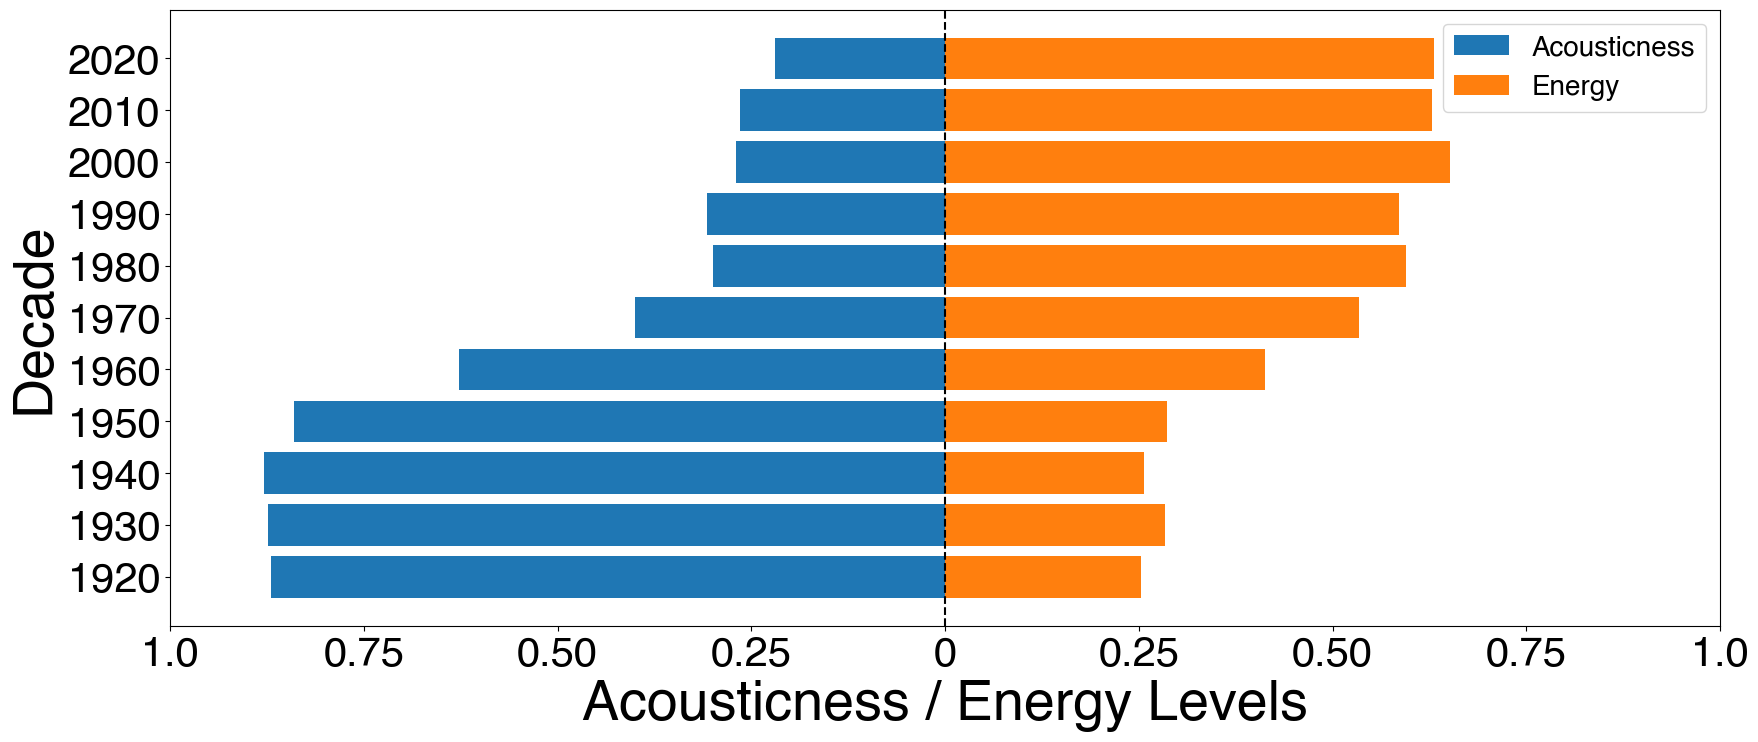

In [16]:
data['decade'] = data['year'].apply(lambda x: (x // 10) * 10)
grouped = data.groupby('decade')[['acousticness', 'energy']].mean().reset_index()

fig, ax = plt.subplots(figsize=(20, 8))
ind = np.arange(len(grouped['decade']))
acoustic_bars = ax.barh(ind, -grouped['acousticness'], label='Acousticness')
energy_bars = ax.barh(ind, grouped['energy'], label='Energy')

ax.set_xlabel('Acousticness / Energy Levels', fontsize=40)
ax.set_ylabel('Decade', fontsize=40)
ax.set_yticks(ind)
ax.set_yticklabels(grouped['decade'], fontsize=30)
ax.set_xticks(np.linspace(-1, 1, 9), minor=True)
ax.set_xticklabels(['1.0', '0.75', '0.50', '0.25', '0', '0.25', '0.50', '0.75', '1.0'], fontsize=30)
ax.axvline(0, color='black', linestyle='--')
ax.legend()

plt.savefig("plots/acousticness-energy-tukey.pdf", format="pdf", bbox_inches="tight")
plt.show()

# 6. In-paper numbers

### 6.1 RQ1 (§V-A)

In [17]:
acousticness_1921 = data[data['year'] == 1921]['acousticness'].values[0]
acousticness_2020 = data[data['year'] == 2020]['acousticness'].values[0]
acousticness_decrease = (acousticness_1921 - acousticness_2020) / acousticness_1921 * 100

print("The acousticness decreased by", acousticness_decrease.round(3), "% between 1921 and 2020")

The acousticness decreased by 75.197 % between 1921 and 2020


In [18]:
energy_1921 = data[data['year'] == 1921]['energy'].values[0]
energy_2020 = data[data['year'] == 2020]['energy'].values[0]
energy_increase = (energy_2020 - energy_1921) / energy_1921 * 100

print("The energy increased by", energy_increase.round(3), "% between 1921 and 2020")

The energy increased by 171.983 % between 1921 and 2020


In [19]:
peak_ratio = data['energy_acousticness_ratio'].max()
peak_ratio_year = data[data['energy_acousticness_ratio'] == peak_ratio]['year'].values[0]

print("The peak ratio between energy and acousticness is", peak_ratio, "in year", peak_ratio_year)

The peak ratio between energy and acousticness is 4.514423076923077 in year 1928


In [20]:
lowest_ratio = data['energy_acousticness_ratio'].min()
lowest_ratio_year = data[data['energy_acousticness_ratio'] == lowest_ratio]['year'].values[0]

print("The lowest ratio between energy and acousticness is", lowest_ratio, "in year", lowest_ratio_year)

The lowest ratio between energy and acousticness is 0.34865293185419965 in year 2020


### 6.2 RQ2 (§V-B)

In [21]:
danceability_std = data['danceability'].std().round(2)
danceability_mean = data['danceability'].mean().round(2)
print("The standard deviation of danceability is", danceability_std, "against the mean of", danceability_mean)

The standard deviation of danceability is 0.05 against the mean of 0.54


In [22]:
danceability_1921 = data[data['year'] == 1921]['danceability'].values[0]
danceability_2020 = data[data['year'] == 2020]['danceability'].values[0]
danceability_increase = (danceability_2020 - danceability_1921) / danceability_1921 * 100

print("The danceability increased by", danceability_increase.round(3), "% between 1921 and 2020")

The danceability increased by 65.394 % between 1921 and 2020


### 6.3 RQ3 (§V-C)

In [23]:
duration_std_1921_1970 = data[data['year'] < 1971]['duration_sec'].std().round(2)
duration_mean_1921_1970 = data[data['year'] < 1971]['duration_sec'].mean().round(2)
print("The standard deviation (1921-1970) is", duration_std_1921_1970, "against the mean of", duration_mean_1921_1970)

The standard deviation (1921-1970) is 24.28 against the mean of 211.3


In [24]:
# standard deviation and mean of the duration between 1971 and 2020
duration_std_1971_2020 = data[data['year'] > 1970]['duration_sec'].std().round(2)
duration_mean_1971_2020 = data[data['year'] > 1970]['duration_sec'].mean().round(2)
print("The standard deviation (1971-2020) is", duration_std_1971_2020, "against the mean of", duration_mean_1971_2020)

The standard deviation (1971-2020) is 14.68 against the mean of 243.3


In [25]:
# the increase in standard deviation of the duration between 1921-1970 and 1971-2020 (%age)
duration_std_increase = abs((duration_std_1971_2020 - duration_std_1921_1970) / duration_std_1971_2020 * 100).round(1)
print("The standard deviation (1921-1970) is", duration_std_increase, "% higher than the standard deviation (1971-2020)")

The standard deviation (1921-1970) is 65.4 % higher than the standard deviation (1971-2020)


In [26]:
# duration decay over between 2010 and 2020 (%age)
duration_2010 = data[data['year'] == 2010]['duration_sec'].values[0]
duration_2020 = data[data['year'] == 2020]['duration_sec'].values[0]
duration_decay = (duration_2010 - duration_2020) / duration_2010 * 100
print("The duration decayed by", duration_decay.round(3), "% between 2010 and 2020")

The duration decayed by 20.215 % between 2010 and 2020
